In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import bs4 

In [ ]:
import os


In [16]:
with open('ch2_ohr_ncp_20190906T1246532096_d_img_d18.xml', 'r') as xml_file:
    contents = xml_file.read()

soup = bs4.BeautifulSoup(contents, 'lxml')

In [17]:
lat = np.zeros((2, 2))
lon = np.zeros((2, 2))

In [18]:
lat[0, 0] = float(soup.find_all('isda:upper_left_latitude')[1].text)
lat[0, 1] = float(soup.find_all('isda:upper_right_latitude')[1].text)
lat[1, 0] = float(soup.find_all('isda:lower_left_latitude')[1].text)
lat[1, 1] = float(soup.find_all('isda:lower_right_latitude')[1].text)
lat

array([[-14.323756, -16.72985 ],
       [-14.735024, -17.15629 ]])

In [19]:
lon[0, 0] = float(soup.find_all('isda:upper_left_longitude')[1].text)
lon[0, 1] = float(soup.find_all('isda:upper_right_longitude')[1].text)
lon[1, 0] = float(soup.find_all('isda:lower_left_longitude')[1].text)
lon[1, 1] = float(soup.find_all('isda:lower_right_longitude')[1].text)
lon

array([[71.334305, 69.174869],
       [71.445725, 69.299801]])

In [20]:
csv = 'ch2_tmc_ncn_20230205T1606344957_g_grd_n18.csv'

In [23]:
df = pd.read_csv(csv)
df['ul_lon_difference'] = df['Longitude'] - lon[0, 0]
df['ur_lon_difference'] = df['Longitude'] - lon[0, 1]
df['ll_lon_difference'] = df['Longitude'] - lon[1, 0]
df['lr_lon_difference'] = df['Longitude'] - lon[1, 1]

df['ul_lat_difference'] = df['Latitude'] - lat[0, 0]
df['ur_lat_difference'] = df['Latitude'] - lat[0, 1]
df['ll_lat_difference'] = df['Latitude'] - lat[1, 0]
df['lr_lat_difference'] = df['Latitude'] - lat[1, 1]

In [24]:
df

,Longitude,Latitude,Pixel,Scan,ul_lon_difference,ur_lon_difference,ll_lon_difference,lr_lon_difference,ul_lat_difference,ur_lat_difference,ll_lat_difference,lr_lat_difference
0,107.500090,-88.514615,0,0,36.165785,38.325221,36.054365,38.200289,-74.190859,-71.784765,-73.779591,-71.358325
1,108.166314,-88.522820,100,0,36.832009,38.991445,36.720589,38.866513,-74.199064,-71.792970,-73.787796,-71.366530
2,108.839827,-88.530823,200,0,37.505522,39.664958,37.394102,39.540026,-74.207067,-71.800973,-73.795799,-71.374533
3,109.520565,-88.538620,300,0,38.186260,40.345696,38.074840,40.220764,-74.214864,-71.808770,-73.803596,-71.382330
4,110.208451,-88.546207,400,0,38.874146,41.033582,38.762726,40.908650,-74.222451,-71.816357,-73.811183,-71.389917
...,...,...,...,...,...,...,...,...,...,...,...,...
61659,313.184047,-66.828147,3600,150205,241.849742,244.009178,241.738322,243.884246,-52.504391,-50.098297,-52.093123,-49.671857
61660,313.137689,-66.828161,3700,150205,241.803384,243.962820,241.691964,243.837888,-52.504405,-50.098311,-52.093137,-49.671871
61661,313.091327,-66.828162,3800,150205,241.757022,243.916458,241.645602,243.791526,-52.504406,-50.098312,-52.093138,-49.671872
61662,313.044960,-66.828148,3900,150205,241.710655,243.870091,241.599235,243.745159,-52.504392,-50.098298,-52.093124,-49.671858


In [66]:
ul_lon_df = df[abs(df['ul_lon_difference']) < 0.1]
ur_lon_df = df[abs(df['ur_lon_difference']) < 0.1]
ll_lon_df = df[abs(df['ll_lon_difference']) < 0.1]
lr_lon_df = df[abs(df['lr_lon_difference']) < 0.1]

ul_lat_df = df[abs(df['ul_lat_difference']) < 0.1]
ur_lat_df = df[abs(df['ur_lat_difference']) < 0.1]
ll_lat_df = df[abs(df['ll_lat_difference']) < 0.1]
lr_lat_df = df[abs(df['lr_lat_difference']) < 0.1]

In [85]:
ur_long_pix=int(df[abs(df['ur_lon_difference']) == min(abs(df['ur_lon_difference']))]['Pixel'])

/tmp/ipykernel_4677/4164855971.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ur_long_pix=int(df[abs(df['ur_lon_difference']) == min(abs(df['ur_lon_difference']))]['Pixel'])


In [86]:
ll_long_pix=int(df[abs(df['ll_lon_difference']) == min(abs(df['ll_lon_difference']))]["Pixel"])

/tmp/ipykernel_4677/592313435.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ll_long_pix=int(df[abs(df['ll_lon_difference']) == min(abs(df['ll_lon_difference']))]["Pixel"])


In [87]:
ur_lat_scan=int(df[abs(df['ur_lat_difference']) == min(abs(df['ur_lat_difference']))]["Scan"])

/tmp/ipykernel_4677/1161981781.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ur_lat_scan=int(df[abs(df['ur_lat_difference']) == min(abs(df['ur_lat_difference']))]["Scan"])


In [88]:
ll_lat_scan=int(df[abs(df['ll_lat_difference']) == min(abs(df['ll_lat_difference']))]['Scan'])

/tmp/ipykernel_4677/1273373090.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ll_lat_scan=int(df[abs(df['ll_lat_difference']) == min(abs(df['ll_lat_difference']))]['Scan'])


In [89]:
with open('ch2_tmc_ncn_20230205T1606344957_d_img_n18.xml', 'r') as xml_file:
    contents = xml_file.read()

soup = bs4.BeautifulSoup(contents, 'lxml')

In [90]:
w=int(soup.find_all("elements")[0].text)
h=int(soup.find_all("elements")[1].text)

In [91]:
filename = 'ch2_tmc_ncn_20230205T1606344957_d_img_n18.img' 

# set width and height 
# w, h = 176476, 4000 

with open(filename, 'rb') as img:
    img_bytes = img.read()
len(img_bytes)

1201648000

In [92]:
img_array = np.frombuffer(img_bytes, dtype = np.uint16).reshape(w, h)
img_array.shape

(150206, 4000)

In [93]:
print(ur_lat_scan,ll_lat_scan)

150205 150205


/tmp/ipykernel_4677/2424065965.py:1: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img_array[ll_lat_scan:ur_lat_scan:-1, ur_long_pix:ll_long_pix], cmap='gray', origin='lower')
/tmp/ipykernel_4677/2424065965.py:1: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img_array[ll_lat_scan:ur_lat_scan:-1, ur_long_pix:ll_long_pix], cmap='gray', origin='lower')


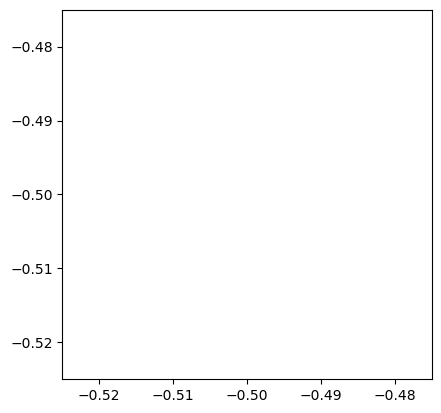

In [94]:
plt.imshow(img_array[ll_lat_scan:ur_lat_scan:-1, ur_long_pix:ll_long_pix], cmap='gray', origin='lower')

another image

In [9]:
filename = 'ch2_tmc_ncn_20211111T1322553940_d_img_d18.img' 

# set width and height 
w, h = 190796, 4000 

with open(filename, 'rb') as img:
    img_bytes = img.read()
len(img_bytes)

1526368000

In [10]:
img_array = np.frombuffer(img_bytes, dtype = np.uint16).reshape(w, h)
img_array.shape

(190796, 4000)

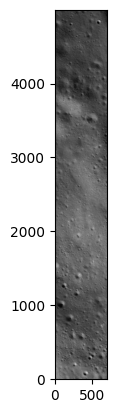

In [15]:
plt.imshow(img_array[185600:180600:-1, 500:1200], cmap='gray', origin='lower')